In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from sklearn import svm

### 1.2 SVM with Gaussian Kernels (i.e. RBF)
(RBF: Radial Basis Function)
- ** 1.2.1 Gaussian Kernel **

In [11]:
# Gaussian kernel for SVM 
def gaussianKernel(x1, x2, sigma):
    sim = np.exp( - np.sum((x1 - x2)**2)/(2*sigma*sigma))
    return sim

In [12]:
gaussianKernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2)

0.32465246735834974

- **1.2.2 Example Dataset 2**

In [2]:
# getting Dataset 2
data = sio.loadmat("ex6data2.mat")
X = data['X']
y = data['y'].ravel()  # or y = data['y'].flatten()
Xn = X[np.where(y == 0)]
Xp = X[np.where(y == 1)]

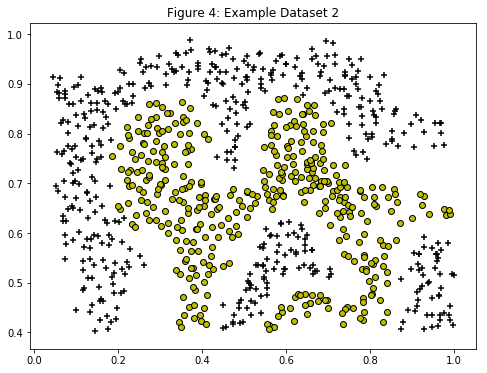

In [7]:
# Visualizing Dataset2
plt.figure(figsize = (8, 6))
plt.scatter(Xn[:, 0], Xn[:, 1], edgecolors = 'k', facecolors = 'y')
plt.scatter(Xp[:, 0], Xp[:, 1], marker = "+", color = 'k')
plt.title("Figure 4: Example Dataset 2")
plt.show()

In [162]:
# Training SVM classifer with RBF Kernel
clf = svm.SVC(kernel = 'rbf', C = 1, probability = True, gamma = 50)  # 特别注意：gamma = 1/(2*sigma*sigma)，此时sigma = 0.1
clf.fit(X, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=50, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

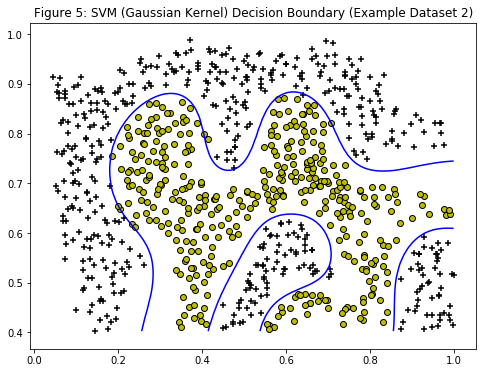

In [173]:
# Plot non-linear boundary (visualizeBoundary) 
x1plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X1, X2 = np.meshgrid(x1plot, x2plot)  # X1的第i(i>=0)列值都为x1plot[i], X2的第i行值都为x2plot[i]
vals = np.zeros_like(X1)
for i in range(100):     # 同一个x1plot[i](X1的第i列值相同)组合所有x1plot[:](X2的每一列都为x1plot[:]) 成为vals的第i列
    this_x = np.hstack((X1[:, i:i+1], X2[:, i:i+1]))
    vals[:, i] = clf.predict_proba(this_x)[:, 0]      # 即val[:, i] = f(x1plot[i], x2plot[:])
'''
for i in range(100):
    for j in range(100):
        vals[j,i] = clf.predict_proba([[x1plot[i], x2plot[j]]])[:, 0]
'''
plt.figure(figsize = (8, 6))
plt.scatter(Xn[:, 0], Xn[:, 1], edgecolors = 'k', facecolors = 'y')
plt.scatter(Xp[:, 0], Xp[:, 1], marker = "+", color = 'k')

plt.contour(X1, X2, vals, [0.5], colors = 'b')
plt.title("Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)")
plt.show()

In [175]:
clf.predict([[0.3, 0.7],[0.6, 0.5]])

array([0, 1], dtype=uint8)

In [176]:
p = clf.predict_proba([[0.3, 0.7]])
print(p)   # p[0]为预测为0的概率，p[1]为预测为1的概率

[[9.99999713e-01 2.86739093e-07]]


- **1.2.3 Example Dataset 3**

In [185]:
def getData(filename):
    data = sio.loadmat(filename)
    return data

In [186]:
def svmTrain(X, y, C, sigma):
    clf = svm.SVC(kernel = 'rbf', C = C, gamma = 1/(2*sigma*sigma), probability = True)
    clf.fit(X, y)
    return clf

In [205]:
def minError(params):
    min_error = 1
    for C in params:
        for sigma in params:
            clf = svmTrain(X, y, C, sigma)
            predval = clf.predict(Xval)
            prederror = 1 - np.mean(predval == yval)
            if min_error > prederror:
                min_error = prederror
                min_mark = [C, sigma]
    return min_mark[0], min_mark[1]

In [269]:
def visualizeBoundary(X, y, clf):
    x1plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2plot = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    X1, X2 = np.meshgrid(x1plot, x2plot)
    vals = np.zeros_like(X1)
    for i in range(100):
        this_x = np.hstack((X1[:, i:i+1], X2[:, i:i+1]))
        vals[:, i] = clf.predict_proba(this_x)[:, 0]
    colors = np.array(['y', 'r'])
    plt.figure(figsize = (8, 6))
    plt.scatter(X[:, 0], X[:, 1], c = colors[y], edgecolors = None )
    plt.contour(X1, X2, vals, [0.5], colors = 'b')
    plt.title("Figure 5: SVM (Gaussian Kernel) Decision Boundary (Example Dataset 2)")
    plt.show()

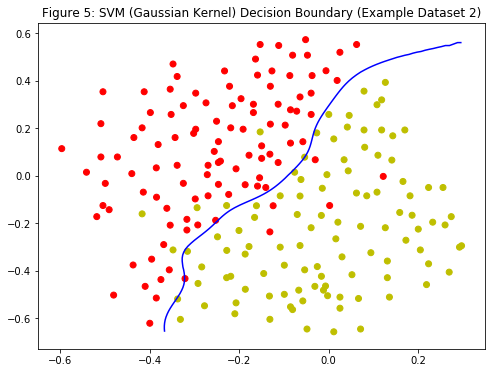

In [270]:
def main():
    data = getData("ex6data3.mat")
    X, y = data['X'], data['y'].ravel()
    Xval, yval = data['Xval'], data['yval'].ravel() 
    params = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    C, sigma = minError(params)
    # print("C = {}, sigma = {}".format(C, sigma))
    clf = svmTrain(X, y, C, sigma)
    visualizeBoundary(X, y, clf)
    
if __name__ == '__main__':
    main()

In [272]:
np.array(['r', 'b'])[np.array([1, 0, 1, 1, 0])]

array(['b', 'r', 'b', 'b', 'r'], dtype='<U1')